In [2]:
import speech_recognition as sr
import os

In [ ]:
for filename in os.listdir(os.getcwd()):
    with open(os.path.join(os.getcwd(), filename), 'r') as f: # open in readonly mode
      # do your stuff


In [59]:
folder = "C:/Users/Andre/Desktop/grad AI/feature engineering/Feature engineering project/Audio MNEST data/free-spoken-digit-dataset-master/recordings/0_jackson_0.wav"

r = sr.Recognizer()

with sr.AudioFile(folder) as source:
    # listen for the data (load audio to memory)
    audio_data = r.record(source)
    # recognize (convert from speech to text)
    text = r.recognize_google(audio_data)
    print(text)

0


In [3]:
import os

directory = "C:/Users/Andre/Desktop/grad AI/feature engineering/Feature engineering project/Audio MNEST data/free-spoken-digit-dataset-master/recordings"

r = sr.Recognizer()
for filename in os.listdir(directory):
    
    f = os.path.join(directory, filename)

    with sr.AudioFile(f) as source:
        try:
            audio_data = r.record(source)
            text = r.recognize_google(audio_data)
            print(text)
        
        except:
            continue
    
    print(f)

0
C:/Users/Andre/Desktop/grad AI/feature engineering/Feature engineering project/Audio MNEST data/free-spoken-digit-dataset-master/recordings\0_george_10.wav
0
C:/Users/Andre/Desktop/grad AI/feature engineering/Feature engineering project/Audio MNEST data/free-spoken-digit-dataset-master/recordings\0_jackson_0.wav
0
C:/Users/Andre/Desktop/grad AI/feature engineering/Feature engineering project/Audio MNEST data/free-spoken-digit-dataset-master/recordings\0_jackson_10.wav
0
C:/Users/Andre/Desktop/grad AI/feature engineering/Feature engineering project/Audio MNEST data/free-spoken-digit-dataset-master/recordings\0_jackson_11.wav
0
C:/Users/Andre/Desktop/grad AI/feature engineering/Feature engineering project/Audio MNEST data/free-spoken-digit-dataset-master/recordings\0_jackson_13.wav
0
C:/Users/Andre/Desktop/grad AI/feature engineering/Feature engineering project/Audio MNEST data/free-spoken-digit-dataset-master/recordings\0_jackson_14.wav
0
C:/Users/Andre/Desktop/grad AI/feature enginee

Siri
C:/Users/Andre/Desktop/grad AI/feature engineering/Feature engineering project/Audio MNEST data/free-spoken-digit-dataset-master/recordings\0_lucas_5.wav
0
C:/Users/Andre/Desktop/grad AI/feature engineering/Feature engineering project/Audio MNEST data/free-spoken-digit-dataset-master/recordings\0_nicolas_11.wav
0
C:/Users/Andre/Desktop/grad AI/feature engineering/Feature engineering project/Audio MNEST data/free-spoken-digit-dataset-master/recordings\0_theo_22.wav
0
C:/Users/Andre/Desktop/grad AI/feature engineering/Feature engineering project/Audio MNEST data/free-spoken-digit-dataset-master/recordings\0_theo_29.wav
0
C:/Users/Andre/Desktop/grad AI/feature engineering/Feature engineering project/Audio MNEST data/free-spoken-digit-dataset-master/recordings\0_theo_30.wav
0
C:/Users/Andre/Desktop/grad AI/feature engineering/Feature engineering project/Audio MNEST data/free-spoken-digit-dataset-master/recordings\0_theo_33.wav
0
C:/Users/Andre/Desktop/grad AI/feature engineering/Featu

2
C:/Users/Andre/Desktop/grad AI/feature engineering/Feature engineering project/Audio MNEST data/free-spoken-digit-dataset-master/recordings\2_lucas_48.wav
2
C:/Users/Andre/Desktop/grad AI/feature engineering/Feature engineering project/Audio MNEST data/free-spoken-digit-dataset-master/recordings\2_lucas_49.wav
free
C:/Users/Andre/Desktop/grad AI/feature engineering/Feature engineering project/Audio MNEST data/free-spoken-digit-dataset-master/recordings\3_lucas_22.wav
3
C:/Users/Andre/Desktop/grad AI/feature engineering/Feature engineering project/Audio MNEST data/free-spoken-digit-dataset-master/recordings\3_lucas_25.wav
free
C:/Users/Andre/Desktop/grad AI/feature engineering/Feature engineering project/Audio MNEST data/free-spoken-digit-dataset-master/recordings\3_lucas_31.wav
free
C:/Users/Andre/Desktop/grad AI/feature engineering/Feature engineering project/Audio MNEST data/free-spoken-digit-dataset-master/recordings\3_lucas_35.wav
3
C:/Users/Andre/Desktop/grad AI/feature engineer

9
C:/Users/Andre/Desktop/grad AI/feature engineering/Feature engineering project/Audio MNEST data/free-spoken-digit-dataset-master/recordings\9_jackson_30.wav
9
C:/Users/Andre/Desktop/grad AI/feature engineering/Feature engineering project/Audio MNEST data/free-spoken-digit-dataset-master/recordings\9_jackson_32.wav
9
C:/Users/Andre/Desktop/grad AI/feature engineering/Feature engineering project/Audio MNEST data/free-spoken-digit-dataset-master/recordings\9_jackson_33.wav
9
C:/Users/Andre/Desktop/grad AI/feature engineering/Feature engineering project/Audio MNEST data/free-spoken-digit-dataset-master/recordings\9_lucas_1.wav
9
C:/Users/Andre/Desktop/grad AI/feature engineering/Feature engineering project/Audio MNEST data/free-spoken-digit-dataset-master/recordings\9_lucas_13.wav
9
C:/Users/Andre/Desktop/grad AI/feature engineering/Feature engineering project/Audio MNEST data/free-spoken-digit-dataset-master/recordings\9_lucas_25.wav
9
C:/Users/Andre/Desktop/grad AI/feature engineering/

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import wave
import pylab
from pathlib import Path
from scipy import signal
from scipy.io import wavfile
from sklearn.metrics import confusion_matrix
import itertools

# Set paths to input and output data

directory = "C:/Users/Andre/Desktop/grad AI/feature engineering/Feature engineering project/Audio MNEST data/free-spoken-digit-dataset-master/recordings"

INPUT_DIR = "C:/Users/Andre/Desktop/grad AI/feature engineering/Feature engineering project/Audio MNEST data/free-spoken-digit-dataset-master/recordings"
OUTPUT_DIR = "C:/Users/Andre/Desktop/grad AI/feature engineering/Feature engineering project/"


parent_list = os.listdir(INPUT_DIR)
for i in range(10):
    print(parent_list[i])


0_george_0.wav
0_george_1.wav
0_george_10.wav
0_george_11.wav
0_george_12.wav
0_george_13.wav
0_george_14.wav
0_george_15.wav
0_george_16.wav
0_george_17.wav


In [3]:
# Utility function to get sound and frame rate info
def get_wav_info(wav_file):
    wav = wave.open(wav_file, 'r')
    frames = wav.readframes(-1)
    sound_info = pylab.frombuffer(frames, 'int16')
    frame_rate = wav.getframerate()
    wav.close()
    return sound_info, frame_rate

# For every recording, make a spectogram and save it as label_speaker_no.png
if not os.path.exists(os.path.join(OUTPUT_DIR, 'audio-images')):
    os.mkdir(os.path.join(OUTPUT_DIR, 'audio-images'))
    
for filename in os.listdir(INPUT_DIR):
    if "wav" in filename:
        file_path = os.path.join(INPUT_DIR, filename)
        file_stem = Path(file_path).stem
        target_dir = f'class_{file_stem[0]}'
        dist_dir = os.path.join(os.path.join(OUTPUT_DIR, 'audio-images'), target_dir)
        file_dist_path = os.path.join(dist_dir, file_stem)
        if not os.path.exists(file_dist_path + '.png'):
            if not os.path.exists(dist_dir):
                os.mkdir(dist_dir)
            file_stem = Path(file_path).stem
            sound_info, frame_rate = get_wav_info(file_path)
            pylab.specgram(sound_info, Fs=frame_rate)
            pylab.savefig(f'{file_dist_path}.png')
            pylab.close()

# Print the ten classes in our dataset
path_list = os.listdir(os.path.join(OUTPUT_DIR, 'audio-images'))
print("Classes: \n")
for i in range(10):
    print(path_list[i])
    
# File names for class 1
path_list = os.listdir(os.path.join(OUTPUT_DIR, 'audio-images/class_1'))
print("\nA few example files: \n")
for i in range(10):
    print(path_list[i])

Classes: 

class_0
class_1
class_2
class_3
class_4
class_5
class_6
class_7
class_8
class_9

A few example files: 

1_george_0.png
1_george_1.png
1_george_10.png
1_george_11.png
1_george_12.png
1_george_13.png
1_george_14.png
1_george_15.png
1_george_16.png
1_george_17.png


In [4]:
# Declare constants
IMAGE_HEIGHT = 256
IMAGE_WIDTH = 256
BATCH_SIZE = 32
N_CHANNELS = 3
N_CLASSES = 10

# Make a dataset containing the training spectrograms
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
                                             batch_size=BATCH_SIZE,
                                             validation_split=0.2,
                                             directory=os.path.join(OUTPUT_DIR, 'audio-images'),
                                             shuffle=True,
                                             color_mode='rgb',
                                             image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
                                             subset="training",
                                             seed=0)

# Make a dataset containing the validation spectrogram
valid_dataset = tf.keras.preprocessing.image_dataset_from_directory(
                                             batch_size=BATCH_SIZE,
                                             validation_split=0.2,
                                             directory=os.path.join(OUTPUT_DIR, 'audio-images'),
                                             shuffle=True,
                                             color_mode='rgb',
                                             image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
                                             subset="validation",
                                             seed=0)

Found 3000 files belonging to 10 classes.
Using 2400 files for training.
Found 3000 files belonging to 10 classes.
Using 600 files for validation.


In [5]:
# Function to prepare our datasets for modelling
def prepare(ds, augment=False):
    # Define our one transformation
    rescale = tf.keras.Sequential([tf.keras.layers.experimental.preprocessing.Rescaling(1./255)])
    flip_and_rotate = tf.keras.Sequential([
        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)
    ])
    
    # Apply rescale to both datasets and augmentation only to training
    ds = ds.map(lambda x, y: (rescale(x, training=True), y))
    if augment: ds = ds.map(lambda x, y: (flip_and_rotate(x, training=True), y))
    return ds

train_dataset = prepare(train_dataset, augment=False)
valid_dataset = prepare(valid_dataset, augment=False)

In [6]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, N_CHANNELS)))
model.add(tf.keras.layers.Conv2D(32, 3, strides=2, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(N_CLASSES, activation='softmax'))

# Compile model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(),
    metrics=['accuracy'],
)

# Train model for 10 epochs, capture the history
history = model.fit(train_dataset, epochs=10, validation_data=valid_dataset)

Epoch 1/10
75/75 [==============================] - 400s 5s/step - loss: 0.6488 - accuracy: 0.8067 - val_loss: 3.3265 - val_accuracy: 0.1417
Epoch 2/10
75/75 [==============================] - 371s 5s/step - loss: 0.2154 - accuracy: 0.9413 - val_loss: 3.7130 - val_accuracy: 0.1183
Epoch 3/10
75/75 [==============================] - 382s 5s/step - loss: 0.1324 - accuracy: 0.9708 - val_loss: 3.2742 - val_accuracy: 0.2283
Epoch 4/10
75/75 [==============================] - 375s 5s/step - loss: 0.0933 - accuracy: 0.9783 - val_loss: 2.6962 - val_accuracy: 0.3650
Epoch 5/10
75/75 [==============================] - 381s 5s/step - loss: 0.0646 - accuracy: 0.9867 - val_loss: 1.1913 - val_accuracy: 0.6117
Epoch 6/10
75/75 [==============================] - 382s 5s/step - loss: 0.0377 - accuracy: 0.9933 - val_loss: 0.4864 - val_accuracy: 0.8517
Epoch 7/10
75/75 [==============================] - 384s 5s/step - loss: 0.0313 - accuracy: 0.9942 - val_loss: 0.1887 - val_accuracy: 0.9433
Epoch 8/10
75

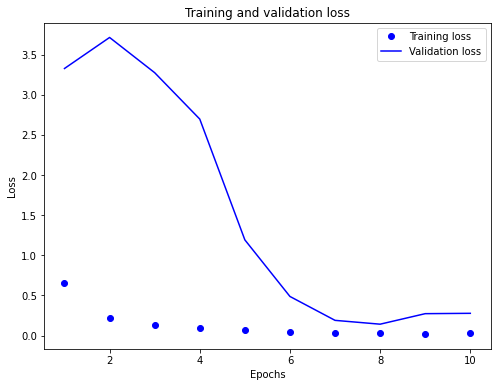

In [7]:
# Plot the loss curves for training and validation.
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)

plt.figure(figsize=(8,6))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

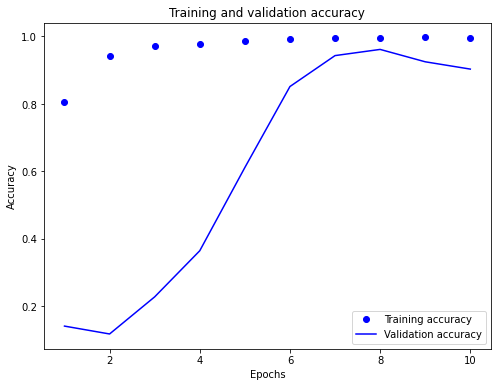

In [8]:
# Plot the accuracy curves for training and validation.
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values)+1)

plt.figure(figsize=(8,6))
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [9]:
# Compute the final loss and accuracy
final_loss, final_acc = model.evaluate(valid_dataset, verbose=0)
print("Final loss: {0:.6f}, final accuracy: {1:.6f}".format(final_loss, final_acc))

Final loss: 0.276373, final accuracy: 0.903333
